In [1]:
import torch
import numpy as np
import argparse
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from torch.nn import MSELoss, L1Loss
import os
from matplotlib import pyplot as plt

In [2]:
!pwd

/home/minghao.fu/df_work/Generative-TS-allin/metrics


In [2]:
df_raw = pd.read_csv("../CSDI/data/solar_nips/train/train.csv", header=None)
df_raw

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
7*24+5*24

288

In [5]:
!pwd

/home/minghao.fu/df_work/Generative-TS-allin


In [20]:
df_raw = pd.read_csv("../CSDI/data/solar_nips/train/train.csv", header=None)
# df_raw.replace(to_replace=-200, value=np.nan, inplace=True)
border = [0,int(len(df_raw)-7*24-5*24),len(df_raw)]
cols_data = df_raw.columns[:] #change for different data
df_data = df_raw[cols_data]
data = df_data.values
test = True #False#True #False #True
if not test:
    data_x = data[border[0]:border[1]]
else:
    data_x = data[border[1]:border[2]]

orig_data = []
observed_mask = []
seq_len = 192
length = len(data_x)-seq_len+1
for i in range(length):
    orig_data.append(data_x[i:i+seq_len])
    observed_mask.append((~np.isnan(data_x[i:i+seq_len])).astype(int))
# imputed_folder = "./results/0_pretrain_sample/solar/pretrain_aq_ettm1_ettm2"
imputed_folder = "./results/0_pretrain_sample/solar/pretrain_aq_ettm1_ecl_more_aq_weather"
if test:
    imputed_path = os.path.join(imputed_folder,"test_samples.npy")
    mask_path = os.path.join(imputed_folder,"test_masks.npy")
    gt_path = os.path.join(imputed_folder,"test_gt.npy")
else:
    imputed_path = os.path.join(imputed_folder,"train_samples.npy")
    mask_path = os.path.join(imputed_folder,"train_masks.npy")
    gt_path = os.path.join(imputed_folder,"train_gt.npy")
synthetic_data = np.load(imputed_path)
gt_data = np.load(gt_path)
target_mask = np.load(mask_path)

scaler = StandardScaler()
scaler.fit(df_data[border[0]:border[1]].values)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(df_data[border[0]:border[1]].values)

StandardScaler()

In [7]:
gt_data.shape

(7, 137, 192)

In [8]:
scaler.transform(df_data[border[0]:border[1]]).max()

3.014460158213296

In [9]:
synthetic_data.max()

8.722748

In [10]:
gt_data.min()

-0.81827796

In [91]:
target_mask.shape,gt_data.shape,synthetic_data.shape

((7, 160, 192), (7, 137, 192), (70, 160, 192))

In [21]:
synthetic_data = np.reshape(synthetic_data,newshape=(gt_data.shape[0],-1,target_mask.shape[1],gt_data.shape[2]))
synthetic_data.shape

(7, 10, 160, 192)

In [22]:
synthetic_data = synthetic_data[:,:,:gt_data.shape[1],:]
target_mask = target_mask[:,:gt_data.shape[1],:]

In [23]:
low_q = np.quantile(synthetic_data,0.05,axis=1)
high_q = np.quantile(synthetic_data,0.95,axis=1)
mid_q = np.quantile(synthetic_data,0.5,axis=1)

In [14]:
def geom_noise_mask_single(L, lm, masking_ratio):
    """
    Randomly create a boolean mask of length `L`, consisting of subsequences of average length lm, masking with 0s a `masking_ratio`
    proportion of the sequence L. The length of masking subsequences and intervals follow a geometric distribution.
    Args:
        L: length of mask and sequence to be masked
        lm: average length of masking subsequences (streaks of 0s)
        masking_ratio: proportion of L to be masked

    Returns:
        (L,) boolean numpy array intended to mask ('drop') with 0s a sequence of length L
    """
    keep_mask = np.ones(L, dtype=bool)
    p_m = 1 / lm  # probability of each masking sequence stopping. parameter of geometric distribution.
    p_u = p_m * masking_ratio / (1 - masking_ratio)
    # probability of each unmasked sequence stopping. parameter of geometric distribution.
    p = [p_m, p_u]

    # Start in state 0 with masking_ratio probability
    state = int(np.random.rand() > masking_ratio)  # state 0 means masking, 1 means not masking
    for i in range(L):
        keep_mask[i] = state  # here it happens that state and masking value corresponding to state are identical
        if np.random.rand() < p[state]:
            state = 1 - state

    return keep_mask.astype(int)

In [69]:
feat_dim

10

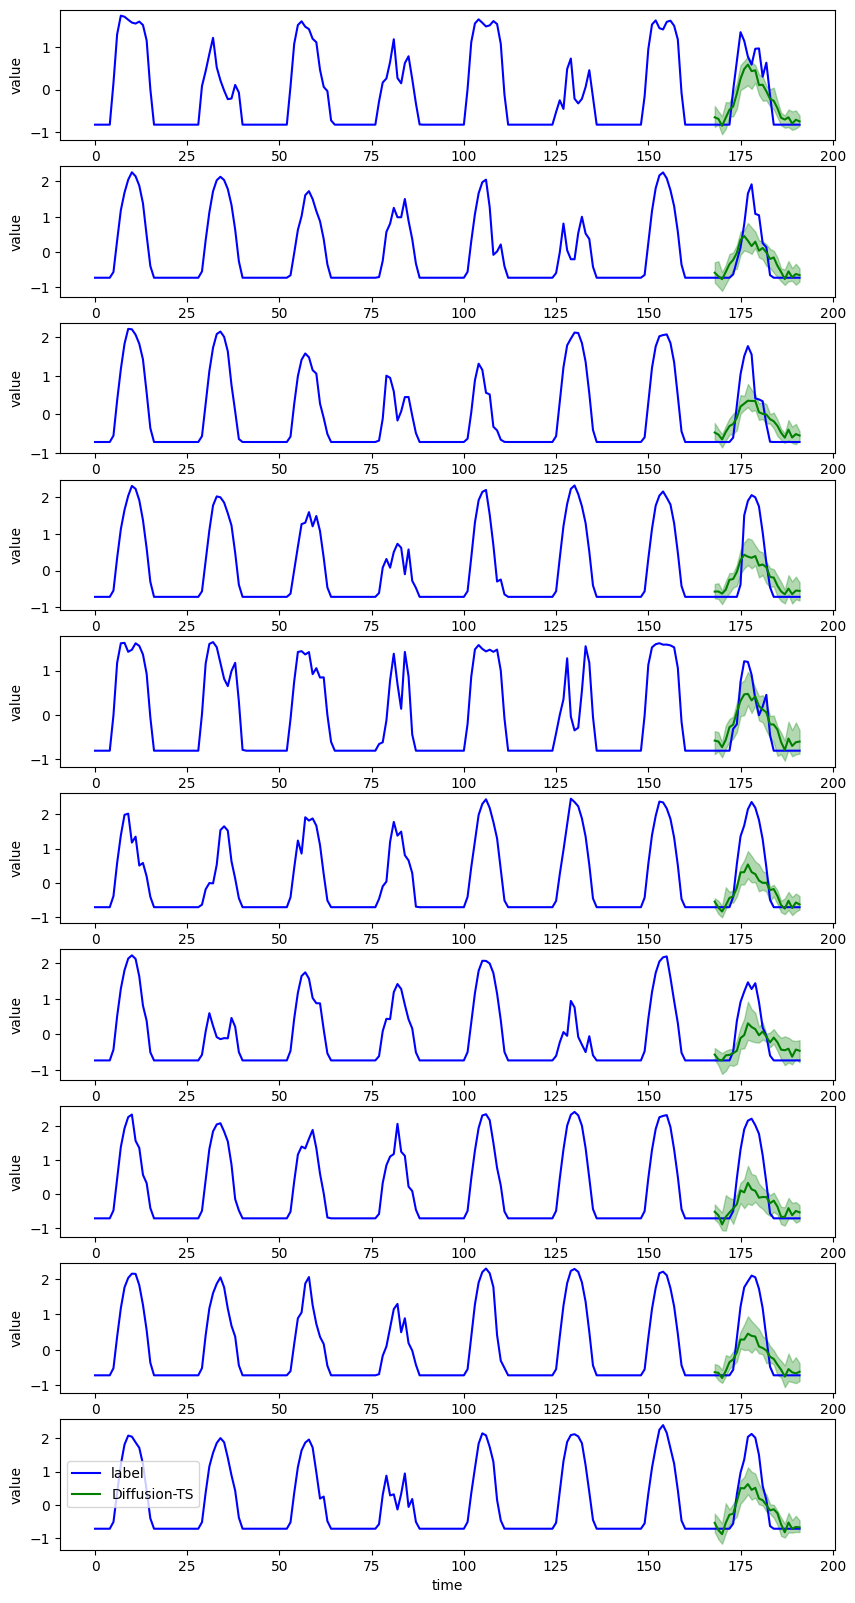

In [24]:
i = 2 #3000
feat_dim = synthetic_data.shape[2]
feat_dim = 10
fig, axes = plt.subplots(nrows=feat_dim, ncols=1, figsize=(10, 20))
for feat_idx in range(feat_dim):
    df_x = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": (1-target_mask)[i, feat_idx, :]})
    df_x = df_x[df_x.y!=0]

    df_o = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": target_mask[i, feat_idx, :]})
    # df_o = df_o[df_o.y!=0]
    axes[feat_idx].plot(df_o.x, df_o.val, color='b',  linestyle='solid', label='label')
    # axes[feat_idx].plot(df_x.x, df_x.val, color='r', marker='x', linestyle='None')
    axes[feat_idx].plot(range(seq_len-24, seq_len), mid_q[i, feat_idx, -24:], color='g', linestyle='solid', label='Diffusion-TS')
    axes[feat_idx].fill_between(range(seq_len-24, seq_len), low_q[i, feat_idx,-24:],high_q[i,feat_idx, -24:], color='g', alpha = 0.3)
    plt.setp(axes[feat_idx], ylabel='value')
    if feat_idx == feat_dim-1:
        plt.setp(axes[-1], xlabel='time')
    # axes[feat_idx].set_ylim(-3, 3)
plt.legend()
plt.show()

In [97]:
import torch as th
def process_mask(x,mask,missing_length = 3, missing_ratio = 0.1, task_name = 'forecast', pred_len = 0):
    if task_name == 'forecast':
        b,l,c = x.shape
        x_mask_history = th.ones_like(x[:, :int((l-pred_len)), :]) #
        x_mask_forecast = th.zeros_like(x[:, -pred_len:, :])
        x_mask = th.cat([x_mask_history, x_mask_forecast], dim=1)
        # import pdb; pdb.set_trace()
        return x*x_mask, x_mask
    
    else:
        x = x * mask
        cond_masks = th.empty_like(x, dtype=th.long)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                cond_mask = geom_noise_mask_single(x[i,j].shape[0], missing_length, missing_ratio)
                cond_masks[i,j] = th.tensor(cond_mask, device=x.device)*mask[i,j]
        return x*cond_masks, cond_masks


In [98]:
!pwd

/home/minghao.fu/df_work/Generative-TS


In [16]:
from metrics.imputation_metrics import mse_withmask, mae_withmask, calc_quantile_CRPS, calc_quantile_CRPS_sum

In [100]:
mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask))

tensor(1.3508)

In [101]:
torch.sqrt(mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask)))

tensor(1.1623)

In [102]:
mae_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask))

tensor(0.9647)

In [103]:
# import pickle
# paths='/home/minghao.fu/df_work/CSDI/data/electricity_nips/meanstd.pkl'
# with open(paths, 'rb') as f:
#     mean_data, std_data = pickle.load(f)

In [104]:
calc_quantile_CRPS(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

1.046064477217825

In [105]:
calc_quantile_CRPS_sum(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.7562964589972245

In [80]:
scaler.scale_

array([107.41468729,  52.5550745 ,  51.95990719,  54.13598549,
        92.35458255, 141.33103374,  47.97404526,  48.64111638,
        53.94765992,  51.65660662,  51.11141546,  28.37250184,
        54.18842664,  52.07689551,  55.61313041,  30.71564571,
        54.08408319,  53.81710101,  51.47921709,  51.71746437,
        54.16212846,  53.75687419,  60.20674724, 114.02360976,
        54.22475203,  45.60569142,  51.12864448,  53.26653531,
       113.42258369,  51.7288813 ,  45.71647586,  98.6647808 ,
        53.8096548 ,  48.31594786,  48.15600576,  42.68233384,
        53.87220445,  38.40000855,  53.14074168,  51.46827724,
       127.35779957,  52.40734078,  54.39217151,  51.50751424,
        77.22358627,  46.14653687,  38.302903  ,  48.5594265 ,
        52.76295245,  53.13444988,  54.07713308,  51.88537728,
        52.84261731,  53.91852645,  48.09269829,  54.1964773 ,
        54.05392659,  48.06964894,  48.39329909,  53.76523801,
        38.0997744 ,  53.96945432,  51.44418378,  48.11

In [81]:
gt_data.shape

(7, 137, 192)

In [82]:
synthetic_data.shape

(7, 10, 137, 192)

In [25]:
unormzalized_gt_data = []
for g in gt_data:
    unormzalized_gt_data.append(np.transpose(np.transpose(g)*scaler.scale_+scaler.mean_))
unormzalized_gt_data = np.array(unormzalized_gt_data)
unormalized_synthetic_data = []
for i in range(len(synthetic_data)):
    for j in range(len(synthetic_data[i])):
        s = synthetic_data[i][j]
        unormalized_synthetic_data.append(np.transpose(np.transpose(s)*scaler.scale_+scaler.mean_))
unormalized_synthetic_data = np.array(unormalized_synthetic_data).reshape(synthetic_data.shape[0],-1,synthetic_data.shape[2],synthetic_data.shape[3])
unormzalized_gt_data.shape,unormalized_synthetic_data.shape

((7, 137, 192), (7, 10, 137, 192))

In [26]:
calc_quantile_CRPS(torch.Tensor(unormzalized_gt_data),torch.Tensor(unormalized_synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.8962260798404091

In [27]:
calc_quantile_CRPS_sum(torch.Tensor(unormzalized_gt_data),torch.Tensor(unormalized_synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)


0.0744564595975374

In [30]:
from gluonts.evaluation import Evaluator
import numpy as np
# Slice to only include the forecast period
from gluonts.model.forecast import SampleForecast
ts_predictions_forecast = synthetic_data[:, :, :, -24:]
ts_targets_forecast = gt_data#[:, :, :] unormzalized_

# Assuming you have a pandas Timestamp for the start of the forecast period
# start_date = pd.Timestamp(...)

# Convert predictions and actual values to list of SampleForecast and actuals
forecasts = []
actuals = []
# Set arbitrary start_date and freq
freq = "1H"  # arbitrary frequency, e.g., hourly
#pd.Timestamp("2000-01-04 18:00").to_period(freq)   # arbitrary start date
start_date_2 = pd.Timestamp("2000-01-01 00:00").to_period(freq)   # arbitrary start date

# Create a pandas date range for the index
# date_range = pd.date_range(start='2000-01-01 00:00', periods=unormzalized_gt_data.shape[-1], freq='H')
period_index = pd.period_range(start=start_date_2, periods=unormzalized_gt_data.shape[-1], freq='H')
start_date = period_index[-24]
# ts_predictions_forecast = pd.Series(ts_predictions_forecast, index = date_range)
# ts_targets_forecast = pd.Series(ts_targets_forecast, index = date_range)

for i in range(ts_predictions_forecast.shape[0]):  # Loop over each time series
    for j in range(ts_predictions_forecast.shape[2]):  # Loop over each feature
        # Create SampleForecast objects for each time series and feature
        ss = ts_predictions_forecast[i, :, j, :]
        # ss.index = ss.index.to_timestamp()
        forecast = SampleForecast(
            samples=ss,
            start_date=start_date,
            # freq="1H"  # or your appropriate frequency
        )
        forecasts.append(forecast)
        data_with_time = pd.DataFrame(ts_targets_forecast[i, j, :], index = period_index)
        # data_with_time.index = start_date_2 #date_range#.to_timestamp()
        # data_with_time.index = pd.to_datetime(data_with_time.index).strftime('%Y-%m-%d %H:%M')

        actuals.append(data_with_time)

# Create an Evaluator with desired quantiles
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])

# Evaluate the forecasts
agg_metrics, item_metrics = evaluator(iter(actuals), iter(forecasts), num_series=len(forecasts))

/home/minghao.fu/.conda/envs/ltsm/lib/python3.10/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
Running evaluation:   0%|                                                | 0/959 [00:00<?, ?it/s]

Running evaluation: 100%|█████████████████████████████████████| 959/959 [00:03<00:00, 299.05it/s]


In [31]:
agg_metrics

{'MSE': 1.677733528529102,
 'abs_error': 22448.562858581543,
 'abs_target_sum': 17638.495121002197,
 'abs_target_mean': 0.7663579736271374,
 'seasonal_error': 0.22728585489737366,
 'MASE': 4.699799982256638,
 'MAPE': 2.930049976790411,
 'sMAPE': 1.1214746953217072,
 'MSIS': 51.69779982563909,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 12548.627250201629,
 'Coverage[0.1]': 0.33607055961070553,
 'QuantileLoss[0.5]': 22448.56286712829,
 'Coverage[0.5]': 0.6036670142509558,
 'QuantileLoss[0.9]': 13842.928303264453,
 'Coverage[0.9]': 0.8746089676746611,
 'RMSE': 1.2952735342502377,
 'NRMSE': 1.690167752962453,
 'ND': 1.2727028414035155,
 'wQuantileLoss[0.1]': 0.7114341197543519,
 'wQuantileLoss[0.5]': 1.2727028418880664,
 'wQuantileLoss[0.9]': 0.7848134553600123,
 'mean_absolute_QuantileLoss': 16280.039473531457,
 'mean_wQuantileLoss': 0.9229834723341436,
 'MAE_Coverage': 0.3915363225582203,
 'OWA': nan}

(7, 137, 192)

In [38]:
actuals[1]

,0
2000-01-01 00:00,-0.726044
2000-01-01 01:00,-0.726044
2000-01-01 02:00,-0.726044
2000-01-01 03:00,-0.726044
2000-01-01 04:00,-0.726044
...,...
2000-01-08 19:00,-0.726044
2000-01-08 20:00,-0.726044
2000-01-08 21:00,-0.726044
2000-01-08 22:00,-0.726044


# Traffic

In [120]:
df_raw = pd.read_csv("../CSDI/data/traffic_nips/train/train.csv", header=None)
# df_raw.replace(to_replace=-200, value=np.nan, inplace=True)
border = [0,int(len(df_raw)-7*24-5*24),len(df_raw)]
cols_data = df_raw.columns[:] #change for different data
df_data = df_raw[cols_data]
data = df_data.values
test = True #False#True #False #True
if not test:
    data_x = data[border[0]:border[1]]
else:
    data_x = data[border[1]:border[2]]

orig_data = []
observed_mask = []
seq_len = 192
length = len(data_x)-seq_len+1
for i in range(length):
    orig_data.append(data_x[i:i+seq_len])
    observed_mask.append((~np.isnan(data_x[i:i+seq_len])).astype(int))
imputed_folder = "./results/0_pretrain_sample/traffic/pretrain_aq_ettm1_ettm2/"
if test:
    imputed_path = os.path.join(imputed_folder,"test_samples.npy")
    mask_path = os.path.join(imputed_folder,"test_masks.npy")
    gt_path = os.path.join(imputed_folder,"test_gt.npy")
else:
    imputed_path = os.path.join(imputed_folder,"train_samples.npy")
    mask_path = os.path.join(imputed_folder,"train_masks.npy")
    gt_path = os.path.join(imputed_folder,"train_gt.npy")
synthetic_data = np.load(imputed_path)
gt_data = np.load(gt_path)
target_mask = np.load(mask_path)

scaler = StandardScaler()
scaler.fit(df_data[border[0]:border[1]].values)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(df_data[border[0]:border[1]].values)

StandardScaler()

In [121]:
gt_data

array([[[0.0263    , 0.02185   , 0.01515   , ..., 0.02955   ,
         0.02948333, 0.02785   ],
        [0.1457    , 0.13556667, 0.104     , ..., 0.11313333,
         0.11663333, 0.11951666],
        [0.0656    , 0.05903333, 0.05115   , ..., 0.06418333,
         0.06238334, 0.0611    ],
        ...,
        [0.05448333, 0.05331667, 0.0476    , ..., 0.05776667,
         0.0551    , 0.05406667],
        [0.09098333, 0.07013334, 0.04953333, ..., 0.07421666,
         0.07233334, 0.07168333],
        [0.17665   , 0.0938    , 0.06005   , ..., 0.06471667,
         0.08513334, 0.0609    ]],

       [[0.02071667, 0.01508333, 0.01345   , ..., 0.02361667,
         0.02276667, 0.0187    ],
        [0.1108    , 0.11431666, 0.10265   , ..., 0.11741666,
         0.12015   , 0.12086666],
        [0.05268333, 0.05336667, 0.04621667, ..., 0.06046667,
         0.0577    , 0.05216667],
        ...,
        [0.05333333, 0.04715   , 0.04041667, ..., 0.04728333,
         0.04501667, 0.04623333],
        [0.0

In [122]:
synthetic_data = np.reshape(synthetic_data,newshape=(gt_data.shape[0],-1,target_mask.shape[1],gt_data.shape[2]))
synthetic_data.shape

(7, 10, 1000, 192)

In [123]:
synthetic_data = synthetic_data[:,:,:gt_data.shape[1],:]
target_mask = target_mask[:,:gt_data.shape[1],:]

In [124]:
low_q = np.quantile(synthetic_data,0.05,axis=1)
high_q = np.quantile(synthetic_data,0.95,axis=1)
mid_q = np.quantile(synthetic_data,0.5,axis=1)

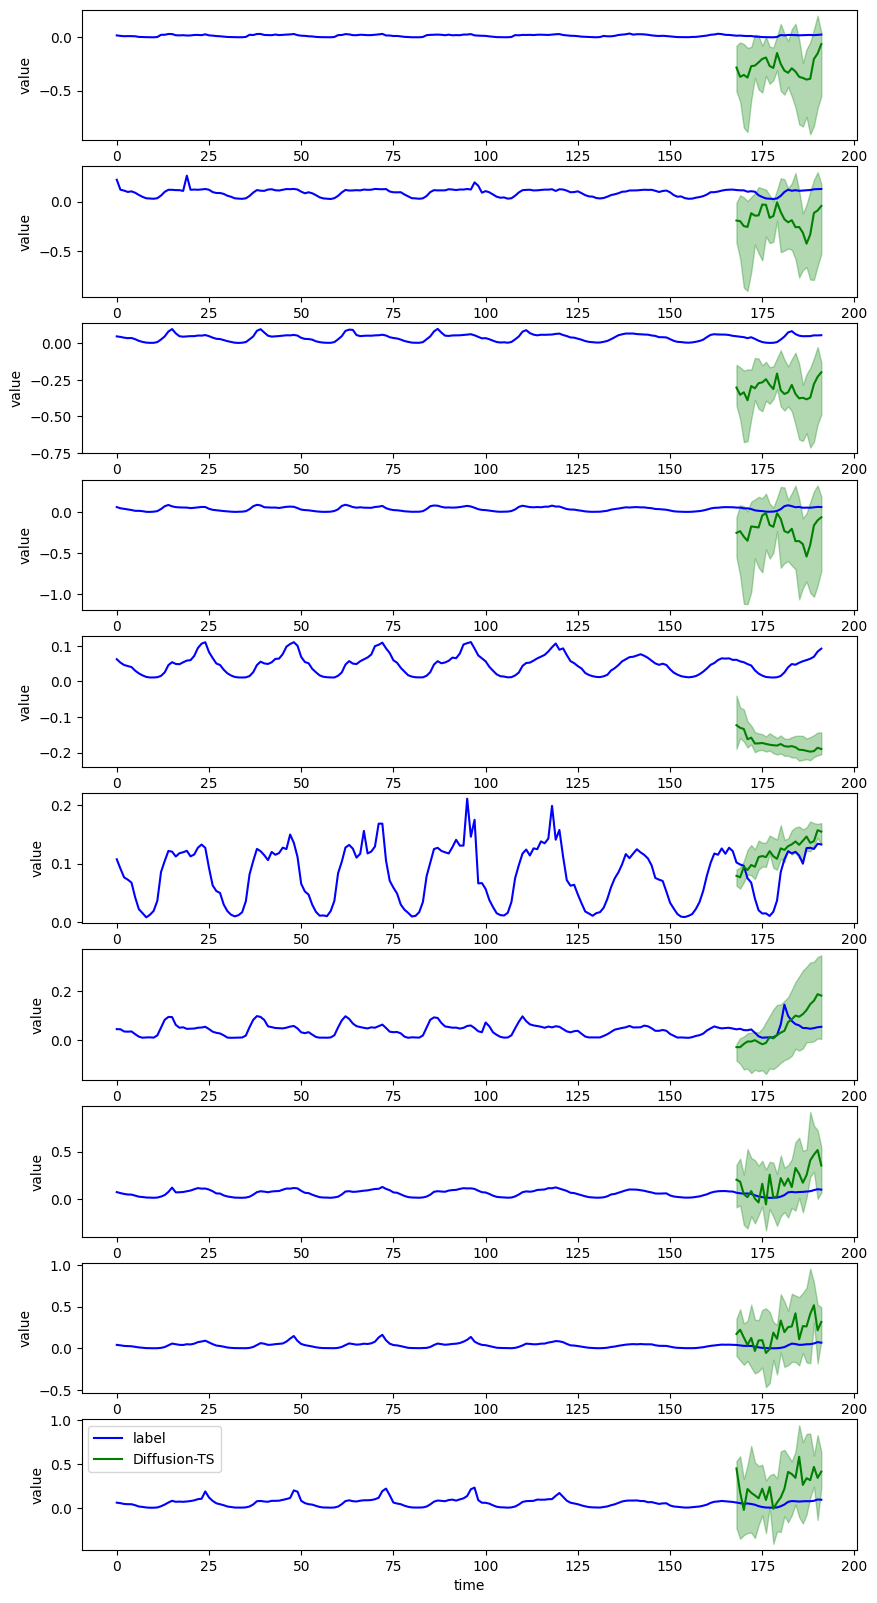

In [125]:
i = 2 #3000
feat_dim = synthetic_data.shape[2]
feat_dim = 10
fig, axes = plt.subplots(nrows=feat_dim, ncols=1, figsize=(10, 20))
for feat_idx in range(feat_dim):
    df_x = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": (1-target_mask)[i, feat_idx, :]})
    df_x = df_x[df_x.y!=0]

    df_o = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": target_mask[i, feat_idx, :]})
    # df_o = df_o[df_o.y!=0]
    axes[feat_idx].plot(df_o.x, df_o.val, color='b',  linestyle='solid', label='label')
    # axes[feat_idx].plot(df_x.x, df_x.val, color='r', marker='x', linestyle='None')
    axes[feat_idx].plot(range(seq_len-24, seq_len), mid_q[i, feat_idx, -24:], color='g', linestyle='solid', label='Diffusion-TS')
    axes[feat_idx].fill_between(range(seq_len-24, seq_len), low_q[i, feat_idx,-24:],high_q[i,feat_idx, -24:], color='g', alpha = 0.3)
    plt.setp(axes[feat_idx], ylabel='value')
    if feat_idx == feat_dim-1:
        plt.setp(axes[-1], xlabel='time')
    # axes[feat_idx].set_ylim(-3, 3)
plt.legend()
plt.show()

In [126]:
mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask))

tensor(0.6110)

In [127]:
torch.sqrt(mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask)))

tensor(0.7817)

In [128]:
calc_quantile_CRPS(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

8.145088597347861

In [129]:
calc_quantile_CRPS_sum(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

1.0830819983231394

In [54]:
from gluonts.evaluation import Evaluator
import numpy as np
# Slice to only include the forecast period
from gluonts.model.forecast import SampleForecast
ts_predictions_forecast = synthetic_data[:, :, :, -24:]
ts_targets_forecast = gt_data#[:, :, :] unormzalized_

# Assuming you have a pandas Timestamp for the start of the forecast period
# start_date = pd.Timestamp(...)

# Convert predictions and actual values to list of SampleForecast and actuals
forecasts = []
actuals = []
# Set arbitrary start_date and freq
freq = "1H"  # arbitrary frequency, e.g., hourly
#pd.Timestamp("2000-01-04 18:00").to_period(freq)   # arbitrary start date
start_date_2 = pd.Timestamp("2000-01-01 00:00").to_period(freq)   # arbitrary start date

# Create a pandas date range for the index
# date_range = pd.date_range(start='2000-01-01 00:00', periods=unormzalized_gt_data.shape[-1], freq='H')
period_index = pd.period_range(start=start_date_2, periods=unormzalized_gt_data.shape[-1], freq='H')
start_date = period_index[-24]
# ts_predictions_forecast = pd.Series(ts_predictions_forecast, index = date_range)
# ts_targets_forecast = pd.Series(ts_targets_forecast, index = date_range)

for i in range(ts_predictions_forecast.shape[0]):  # Loop over each time series
    for j in range(ts_predictions_forecast.shape[2]):  # Loop over each feature
        # Create SampleForecast objects for each time series and feature
        ss = ts_predictions_forecast[i, :, j, :]
        # ss.index = ss.index.to_timestamp()
        forecast = SampleForecast(
            samples=ss,
            start_date=start_date,
            # freq="1H"  # or your appropriate frequency
        )
        forecasts.append(forecast)
        data_with_time = pd.DataFrame(ts_targets_forecast[i, j, :], index = period_index)
        # data_with_time.index = start_date_2 #date_range#.to_timestamp()
        # data_with_time.index = pd.to_datetime(data_with_time.index).strftime('%Y-%m-%d %H:%M')

        actuals.append(data_with_time)

# Create an Evaluator with desired quantiles
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])

# Evaluate the forecasts
agg_metrics, item_metrics = evaluator(iter(actuals), iter(forecasts), num_series=len(forecasts))

Running evaluation: 100%|██████████████████████████████████| 6741/6741 [00:03<00:00, 1726.20it/s]


In [56]:
actuals[0]

,0
2000-01-01 00:00,0.026300
2000-01-01 01:00,0.021850
2000-01-01 02:00,0.015150
2000-01-01 03:00,0.013917
2000-01-01 04:00,0.014350
...,...
2000-01-08 19:00,0.035950
2000-01-08 20:00,0.025700
2000-01-08 21:00,0.029550
2000-01-08 22:00,0.029483


In [58]:
agg_metrics

{'MSE': 0.0005848466882698253,
 'abs_error': 1672.9918068759143,
 'abs_target_sum': 8591.935595775023,
 'abs_target_mean': 0.05310744941264293,
 'seasonal_error': 0.012114176947786395,
 'MASE': 0.9386897669376607,
 'MAPE': 0.25662209393508856,
 'sMAPE': 0.20154542842149406,
 'MSIS': 8.010274419361814,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 765.5385337593791,
 'Coverage[0.1]': 0.13524205112990162,
 'QuantileLoss[0.5]': 1672.991804860707,
 'Coverage[0.5]': 0.4712703357563171,
 'QuantileLoss[0.9]': 938.4656007080571,
 'Coverage[0.9]': 0.8945322157938981,
 'RMSE': 0.024183603707260533,
 'NRMSE': 0.4553712139205711,
 'ND': 0.19471652088483846,
 'wQuantileLoss[0.1]': 0.08909965923578653,
 'wQuantileLoss[0.5]': 0.19471652065029207,
 'wQuantileLoss[0.9]': 0.10922633092938171,
 'mean_absolute_QuantileLoss': 1125.665313109381,
 'mean_wQuantileLoss': 0.1310141702718201,
 'MAE_Coverage': 0.39817740526463274,
 'OWA': nan}

In [60]:
item_metrics['QuantileLoss[0.5]'].mean()

0.2481815464857895

# Traffic is no need to do the normailization!

# ECL

In [160]:
df_raw = pd.read_csv("./datasets/ETT-small/ETTm2.csv")
df_raw.replace(to_replace=-200, value=np.nan, inplace=True)
border = [0,int(len(df_raw)*0.8),len(df_raw)]
cols_data = df_raw.columns[1:] #change for different data
df_data = df_raw[cols_data]
data = df_data.values
test = True #False#True #False #True
if not test:
    data_x = data[border[0]:border[1]]
else:
    data_x = data[border[1]:border[2]]

orig_data = []
observed_mask = []
seq_len = 192
length = len(data_x)-seq_len+1
for i in range(length):
    orig_data.append(data_x[i:i+seq_len])
    observed_mask.append((~np.isnan(data_x[i:i+seq_len])).astype(int))
imputed_folder = "./results/0_pretrain_sample/electricity/pretrain_aq_ettm1"
if test:
    imputed_path = os.path.join(imputed_folder,"test_samples.npy")
    mask_path = os.path.join(imputed_folder,"test_masks.npy")
    gt_path = os.path.join(imputed_folder,"test_gt.npy")
else:
    imputed_path = os.path.join(imputed_folder,"train_samples.npy")
    mask_path = os.path.join(imputed_folder,"train_masks.npy")
    gt_path = os.path.join(imputed_folder,"train_gt.npy")
synthetic_data = np.load(imputed_path)
gt_data = np.load(gt_path)
target_mask = np.load(mask_path)

scaler = StandardScaler()
scaler.fit(df_data[border[0]:border[1]].values)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(df_data[border[0]:border[1]].values)

StandardScaler()

In [161]:
synthetic_data = np.reshape(synthetic_data,newshape=(gt_data.shape[0],-1,target_mask.shape[1],gt_data.shape[2]))
synthetic_data = synthetic_data[:,:,:gt_data.shape[1],:]
target_mask = target_mask[:,:gt_data.shape[1],:]

In [162]:
low_q = np.quantile(synthetic_data,0.05,axis=1)
high_q = np.quantile(synthetic_data,0.95,axis=1)
mid_q = np.quantile(synthetic_data,0.5,axis=1)

In [163]:
def geom_noise_mask_single(L, lm, masking_ratio):
    """
    Randomly create a boolean mask of length `L`, consisting of subsequences of average length lm, masking with 0s a `masking_ratio`
    proportion of the sequence L. The length of masking subsequences and intervals follow a geometric distribution.
    Args:
        L: length of mask and sequence to be masked
        lm: average length of masking subsequences (streaks of 0s)
        masking_ratio: proportion of L to be masked

    Returns:
        (L,) boolean numpy array intended to mask ('drop') with 0s a sequence of length L
    """
    keep_mask = np.ones(L, dtype=bool)
    p_m = 1 / lm  # probability of each masking sequence stopping. parameter of geometric distribution.
    p_u = p_m * masking_ratio / (1 - masking_ratio)
    # probability of each unmasked sequence stopping. parameter of geometric distribution.
    p = [p_m, p_u]

    # Start in state 0 with masking_ratio probability
    state = int(np.random.rand() > masking_ratio)  # state 0 means masking, 1 means not masking
    for i in range(L):
        keep_mask[i] = state  # here it happens that state and masking value corresponding to state are identical
        if np.random.rand() < p[state]:
            state = 1 - state

    return keep_mask.astype(int)

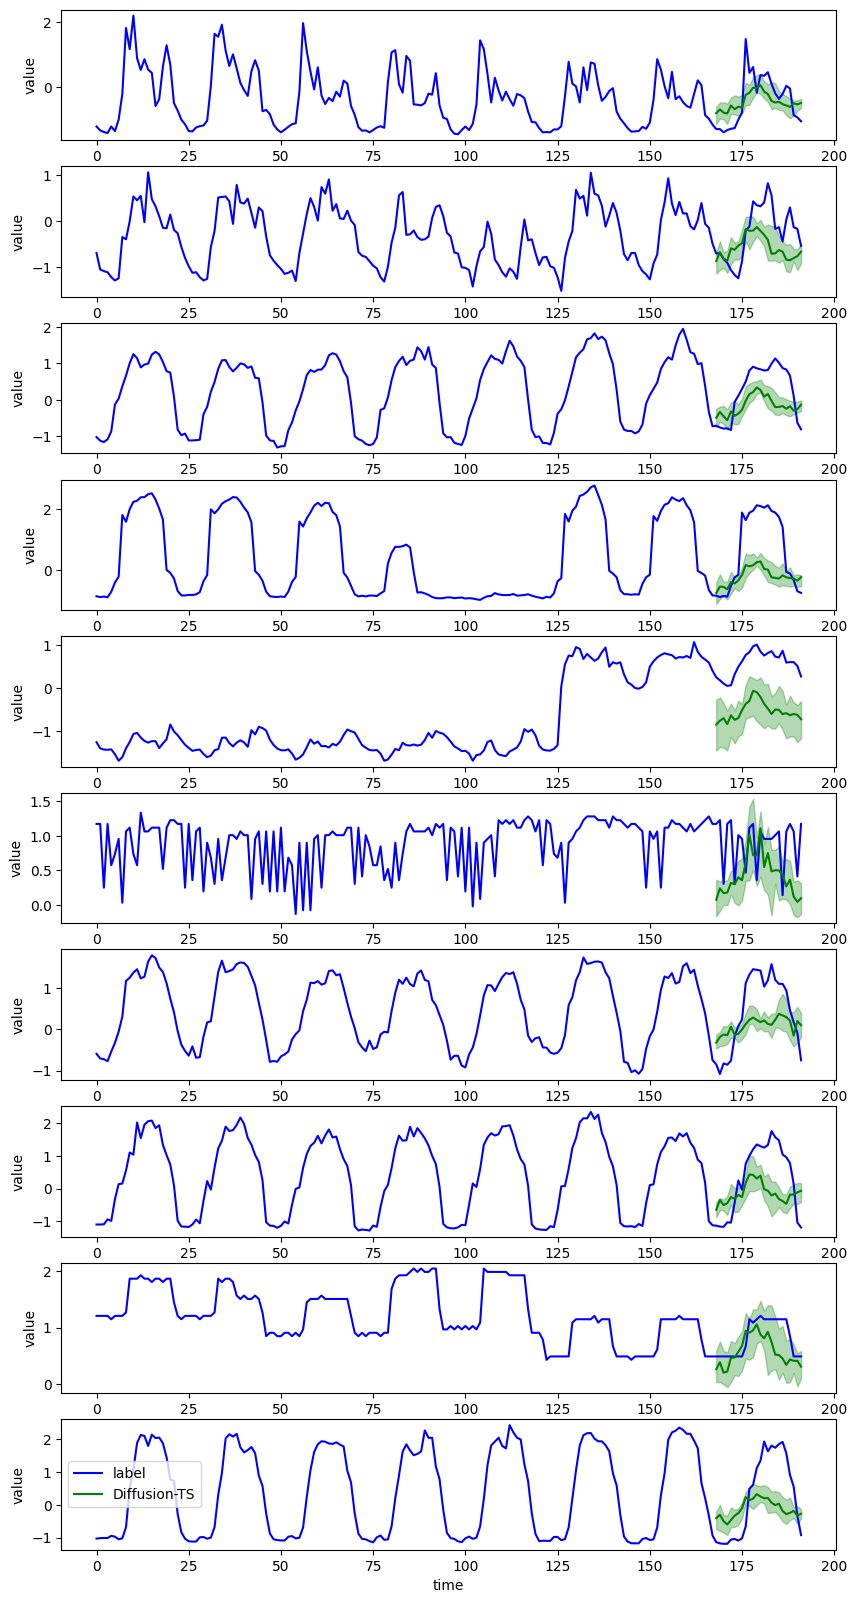

In [164]:
i = 2 #3000
feat_dim = synthetic_data.shape[2]
feat_dim = 10
fig, axes = plt.subplots(nrows=feat_dim, ncols=1, figsize=(10, 20))
for feat_idx in range(feat_dim):
    df_x = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": (1-target_mask)[i, feat_idx, :]})
    df_x = df_x[df_x.y!=0]

    df_o = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": target_mask[i, feat_idx, :]})
    # df_o = df_o[df_o.y!=0]
    axes[feat_idx].plot(df_o.x, df_o.val, color='b',  linestyle='solid', label='label')
    # axes[feat_idx].plot(df_x.x, df_x.val, color='r', marker='x', linestyle='None')
    axes[feat_idx].plot(range(seq_len-24, seq_len), mid_q[i, feat_idx, -24:], color='g', linestyle='solid', label='Diffusion-TS')
    axes[feat_idx].fill_between(range(seq_len-24, seq_len), low_q[i, feat_idx,-24:],high_q[i,feat_idx, -24:], color='g', alpha = 0.3)
    plt.setp(axes[feat_idx], ylabel='value')
    if feat_idx == feat_dim-1:
        plt.setp(axes[-1], xlabel='time')
    # axes[feat_idx].set_ylim(-3, 3)
plt.legend()
plt.show()

In [165]:
from metrics.imputation_metrics import mse_withmask, mae_withmask, calc_quantile_CRPS, calc_quantile_CRPS_sum

In [166]:
import pickle
paths='/home/minghao.fu/df_work/CSDI/data/electricity_nips/meanstd.pkl'
with open(paths, 'rb') as f:
    mean_data, std_data = pickle.load(f)

In [167]:
unormzalized_gt_data = []
for g in gt_data:
    unormzalized_gt_data.append(np.transpose(np.transpose(g)*std_data+mean_data))
unormzalized_gt_data = np.array(unormzalized_gt_data)
unormalized_synthetic_data = []
for i in range(len(synthetic_data)):
    for j in range(len(synthetic_data[i])):
        s = synthetic_data[i][j]
        unormalized_synthetic_data.append(np.transpose(np.transpose(s)*std_data+mean_data))
unormalized_synthetic_data = np.array(unormalized_synthetic_data).reshape(synthetic_data.shape[0],-1,synthetic_data.shape[2],synthetic_data.shape[3])
unormzalized_gt_data.shape,unormalized_synthetic_data.shape

((7, 370, 192), (7, 10, 370, 192))

In [168]:
calc_quantile_CRPS(torch.Tensor(unormzalized_gt_data),torch.Tensor(unormalized_synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.2806452951933208

In [169]:
calc_quantile_CRPS_sum(torch.Tensor(unormzalized_gt_data),torch.Tensor(unormalized_synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)


0.020185056485627826

# Wiki

In [151]:
df_raw = pd.read_csv("../CSDI/data/wiki_2000/train/train.csv", header=None)
# df_raw.replace(to_replace=-200, value=np.nan, inplace=True)
border = [0,int(len(df_raw)-2*30-5*30),len(df_raw)]
cols_data = df_raw.columns[:] #change for different data
df_data = df_raw[cols_data]
data = df_data.values
test = True #False#True #False #True
if not test:
    data_x = data[border[0]:border[1]]
else:
    data_x = data[border[1]:border[2]]

orig_data = []
observed_mask = []
seq_len = 120
length = len(data_x)-seq_len+1
for i in range(length):
    orig_data.append(data_x[i:i+seq_len])
    observed_mask.append((~np.isnan(data_x[i:i+seq_len])).astype(int))
imputed_folder = "./results/wiki_wo_text/"
if test:
    imputed_path = os.path.join(imputed_folder,"test_samples.npy")
    mask_path = os.path.join(imputed_folder,"test_masks.npy")
    gt_path = os.path.join(imputed_folder,"test_gt.npy")
else:
    imputed_path = os.path.join(imputed_folder,"train_samples.npy")
    mask_path = os.path.join(imputed_folder,"train_masks.npy")
    gt_path = os.path.join(imputed_folder,"train_gt.npy")
synthetic_data = np.load(imputed_path)
gt_data = np.load(gt_path)
target_mask = np.load(mask_path)

scaler = StandardScaler()
scaler.fit(df_data[border[0]:border[1]].values)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(df_data[border[0]:border[1]].values)

StandardScaler()

In [155]:
gt_data.max()

35375.043

In [152]:
synthetic_data.max()

35375.043

In [153]:
synthetic_data = np.reshape(synthetic_data,newshape=(gt_data.shape[0],-1,gt_data.shape[1],gt_data.shape[2]))
synthetic_data.shape

(5, 10, 2000, 120)

In [156]:
low_q = np.quantile(synthetic_data,0.05,axis=1)
high_q = np.quantile(synthetic_data,0.95,axis=1)
mid_q = np.quantile(synthetic_data,0.5,axis=1)

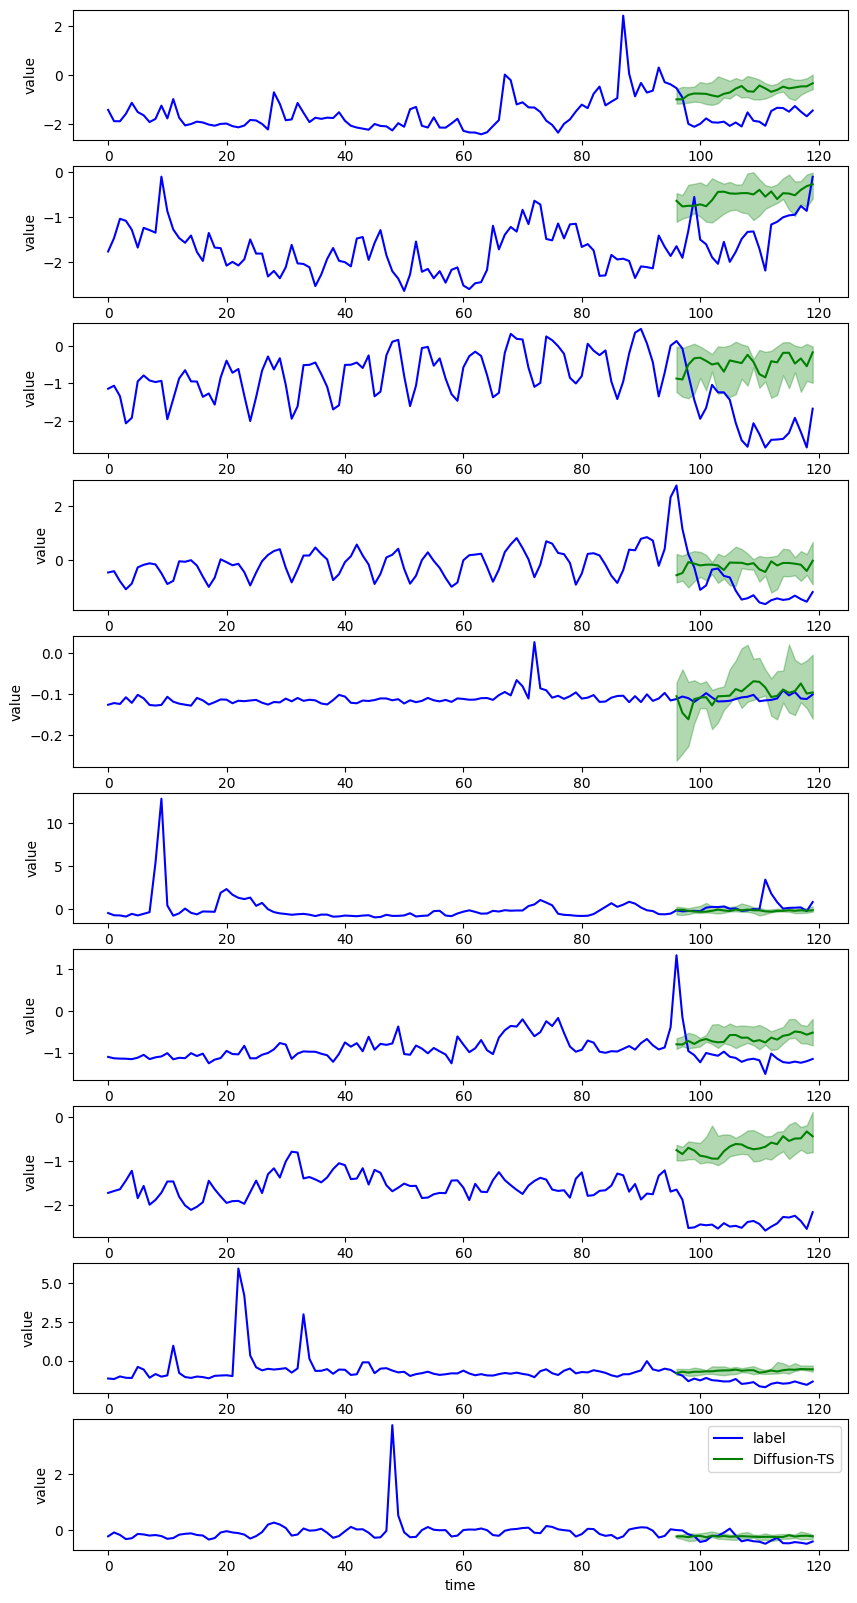

In [157]:
i = 2 #3000
feat_dim = synthetic_data.shape[2]
feat_dim = 10
fig, axes = plt.subplots(nrows=feat_dim, ncols=1, figsize=(10, 20))
for feat_idx in range(feat_dim):
    df_x = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": (1-target_mask)[i, feat_idx, :]})
    df_x = df_x[df_x.y!=0]

    df_o = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": target_mask[i, feat_idx, :]})
    # df_o = df_o[df_o.y!=0]
    axes[feat_idx].plot(df_o.x, df_o.val, color='b',  linestyle='solid', label='label')
    # axes[feat_idx].plot(df_x.x, df_x.val, color='r', marker='x', linestyle='None')
    axes[feat_idx].plot(range(seq_len-24, seq_len), mid_q[i, feat_idx, -24:], color='g', linestyle='solid', label='Diffusion-TS')
    axes[feat_idx].fill_between(range(seq_len-24, seq_len), low_q[i, feat_idx,-24:],high_q[i,feat_idx, -24:], color='g', alpha = 0.3)
    plt.setp(axes[feat_idx], ylabel='value')
    if feat_idx == feat_dim-1:
        plt.setp(axes[-1], xlabel='time')
    # axes[feat_idx].set_ylim(-3, 3)
plt.legend()
plt.show()

In [158]:
mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask))

tensor(604.4760)

In [159]:
torch.sqrt(mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask)))

tensor(24.5861)

In [13]:
calc_quantile_CRPS(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.8173386423211348

In [14]:
calc_quantile_CRPS_sum(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.2823463992068642

In [15]:
unormzalized_gt_data = []
for g in gt_data:
    unormzalized_gt_data.append(np.transpose(np.transpose(g)*scaler.scale_+scaler.mean_))
unormzalized_gt_data = np.array(unormzalized_gt_data)
unormalized_synthetic_data = []
for i in range(len(synthetic_data)):
    for j in range(len(synthetic_data[i])):
        s = synthetic_data[i][j]
        unormalized_synthetic_data.append(np.transpose(np.transpose(s)*scaler.scale_+scaler.mean_))
unormalized_synthetic_data = np.array(unormalized_synthetic_data).reshape(synthetic_data.shape[0],-1,synthetic_data.shape[2],synthetic_data.shape[3])
unormzalized_gt_data.shape,unormalized_synthetic_data.shape

((5, 2000, 120), (5, 10, 2000, 120))

In [16]:
calc_quantile_CRPS(torch.Tensor(unormzalized_gt_data),torch.Tensor(unormalized_synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.33933298211348684

In [17]:
calc_quantile_CRPS_sum(torch.Tensor(unormzalized_gt_data),torch.Tensor(unormalized_synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.093818325745432

In [21]:
from gluonts.evaluation import Evaluator
import numpy as np

# Assuming ts_predictions is your model's output with shape [32, 10, 5, 24]
# and ts_targets is your actual observed values with shape [32, 5, 24]

# You need to convert the predictions and actuals to the required format
# For the predictions, you can take the mean over the sample dimension if you want a point estimate
forecast_it = [np.mean(ts_predictions[:, :, i, :], axis=1) for i in range(5)]  # list of 32 point forecasts for each feature
tss_it = [ts_targets[:, i, :] for i in range(5)]  # list of 32 actual time series for each feature

# Create an Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])

# Evaluate the forecasts
agg_metrics, item_metrics = evaluator(iter(tss_it), iter(forecast_it), num_series=len(tss_it))

# Print the results
print(agg_metrics)

/home/minghao.fu/.conda/envs/ltsm/lib/python3.10/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


NameError: name 'ts_predictions' is not defined

In [22]:
unormzalized_gt_data.shape

(5, 2000, 120)

In [47]:
unormalized_synthetic_data.shape

(5, 10, 2000, 120)

In [88]:
# Slice to only include the forecast period
from gluonts.model.forecast import SampleForecast
ts_predictions_forecast = unormalized_synthetic_data[:, :, :, 90:]
ts_targets_forecast = unormzalized_gt_data#[:, :, :]

# Assuming you have a pandas Timestamp for the start of the forecast period
# start_date = pd.Timestamp(...)

# Convert predictions and actual values to list of SampleForecast and actuals
forecasts = []
actuals = []
# Set arbitrary start_date and freq
freq = "1H"  # arbitrary frequency, e.g., hourly
#pd.Timestamp("2000-01-04 18:00").to_period(freq)   # arbitrary start date
start_date_2 = pd.Timestamp("2000-01-01 00:00").to_period(freq)   # arbitrary start date

# Create a pandas date range for the index
# date_range = pd.date_range(start='2000-01-01 00:00', periods=unormzalized_gt_data.shape[-1], freq='H')
period_index = pd.period_range(start=start_date_2, periods=unormzalized_gt_data.shape[-1], freq='H')
start_date = period_index[-30]
# ts_predictions_forecast = pd.Series(ts_predictions_forecast, index = date_range)
# ts_targets_forecast = pd.Series(ts_targets_forecast, index = date_range)

for i in range(ts_predictions_forecast.shape[0]):  # Loop over each time series
    for j in range(ts_predictions_forecast.shape[2]):  # Loop over each feature
        # Create SampleForecast objects for each time series and feature
        ss = ts_predictions_forecast[i, :, j, :]
        # ss.index = ss.index.to_timestamp()
        forecast = SampleForecast(
            samples=ss,
            start_date=start_date,
            # freq="1H"  # or your appropriate frequency
        )
        forecasts.append(forecast)
        data_with_time = pd.DataFrame(ts_targets_forecast[i, j, :], index = period_index)
        # data_with_time.index = start_date_2 #date_range#.to_timestamp()
        # data_with_time.index = pd.to_datetime(data_with_time.index).strftime('%Y-%m-%d %H:%M')

        actuals.append(data_with_time)

# Create an Evaluator with desired quantiles
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])

# Evaluate the forecasts
agg_metrics, item_metrics = evaluator(iter(actuals), iter(forecasts), num_series=len(forecasts))

Running evaluation:   0%|                                              | 0/10000 [00:00<?, ?it/s]

Running evaluation: 100%|████████████████████████████████| 10000/10000 [00:04<00:00, 2136.96it/s]


In [89]:
agg_metrics

{'MSE': 201469598358.04776,
 'abs_error': 48644578014.48976,
 'abs_target_sum': 979335448.2751774,
 'abs_target_mean': 3264.451494250591,
 'seasonal_error': 1362.4337199710178,
 'MASE': 535.6442692467546,
 'MAPE': 1647.8420589644884,
 'sMAPE': 1.856831207591783,
 'MSIS': 5297.723214757227,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 30687922623.517887,
 'Coverage[0.1]': 0.010853333333333333,
 'QuantileLoss[0.5]': 48644578014.48976,
 'Coverage[0.5]': 0.37331666666666663,
 'QuantileLoss[0.9]': 30816137818.0589,
 'Coverage[0.9]': 0.9862799999999999,
 'RMSE': 448853.6491530928,
 'NRMSE': 137.4974172364398,
 'ND': 49.67100711014131,
 'wQuantileLoss[0.1]': 31.335455770100012,
 'wQuantileLoss[0.5]': 49.67100711014131,
 'wQuantileLoss[0.9]': 31.466376380363663,
 'mean_absolute_QuantileLoss': 36716212818.68885,
 'mean_wQuantileLoss': 37.49094642020166,
 'MAE_Coverage': 0.48628,
 'OWA': nan}

In [1]:
item_metrics

NameError: name 'item_metrics' is not defined

In [87]:
period_index[-30]

Period('2000-01-04 18:00', 'H')

In [86]:
data_with_time.index[-30]

Period('2000-01-04 18:00', 'H')

In [83]:
type(data_with_time.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [69]:
forecast.index.intersection()

TypeError: Index.intersection() missing 1 required positional argument: 'other'

In [67]:
date_range

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2000-01-05 14:00:00', '2000-01-05 15:00:00',
               '2000-01-05 16:00:00', '2000-01-05 17:00:00',
               '2000-01-05 18:00:00', '2000-01-05 19:00:00',
               '2000-01-05 20:00:00', '2000-01-05 21:00:00',
               '2000-01-05 22:00:00', '2000-01-05 23:00:00'],
              dtype='datetime64[ns]', length=120, freq='H')

In [79]:
forecasts[0].start_date

Period('2000-01-04 18:00', 'H')

In [65]:
actuals[0]

,0
2000-01-01 00:00,5947.668369
2000-01-01 01:00,5330.381474
2000-01-01 02:00,6063.851680
2000-01-01 03:00,5772.888330
2000-01-01 04:00,5224.301215
...,...
2000-01-05 19:00,5058.613761
2000-01-05 20:00,3927.089153
2000-01-05 21:00,3915.976283
2000-01-05 22:00,4380.709204


In [53]:
data_with_time[90:]

,0
2000-01-04 18:00:00,8522.377895
2000-01-04 19:00:00,7061.628049
2000-01-04 20:00:00,7394.343341
2000-01-04 21:00:00,5578.897009
2000-01-04 22:00:00,5075.328203
2000-01-04 23:00:00,4961.425614
2000-01-05 00:00:00,5585.891361
2000-01-05 01:00:00,6764.882287
2000-01-05 02:00:00,6133.422742
2000-01-05 03:00:00,5036.361488


In [46]:
len(actuals)

10000

In [42]:
actuals[0].shape

(30,)

In [29]:
agg_metrics

NameError: name 'agg_metrics' is not defined

# Exchange

In [8]:
df_raw = pd.read_csv("../CSDI/data/exchange/train/train.csv", header=None)
# df_raw.replace(to_replace=-200, value=np.nan, inplace=True)
border = [0,int(len(df_raw)-7*24-5*24),len(df_raw)]
cols_data = df_raw.columns[:] #change for different data
df_data = df_raw[cols_data]
data = df_data.values
test = True #False#True #False #True
if not test:
    data_x = data[border[0]:border[1]]
else:
    data_x = data[border[1]:border[2]]

orig_data = []
observed_mask = []
seq_len = 120
length = len(data_x)-seq_len+1
for i in range(length):
    orig_data.append(data_x[i:i+seq_len])
    observed_mask.append((~np.isnan(data_x[i:i+seq_len])).astype(int))
imputed_folder = "./results/exchange_wo_text/"
if test:
    imputed_path = os.path.join(imputed_folder,"test_samples.npy")
    mask_path = os.path.join(imputed_folder,"test_masks.npy")
    gt_path = os.path.join(imputed_folder,"test_gt.npy")
else:
    imputed_path = os.path.join(imputed_folder,"train_samples.npy")
    mask_path = os.path.join(imputed_folder,"train_masks.npy")
    gt_path = os.path.join(imputed_folder,"train_gt.npy")
synthetic_data = np.load(imputed_path)
gt_data = np.load(gt_path)
target_mask = np.load(mask_path)

scaler = StandardScaler()
scaler.fit(df_data[border[0]:border[1]].values)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(df_data[border[0]:border[1]].values)

StandardScaler()

In [9]:
df_raw

,0,1,2,3,4,5,6,7
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
1,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.593000,0.525486
2,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.594000,0.523972
3,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.597300,0.526316
4,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834
...,...,...,...,...,...,...,...,...
6067,1.027591,1.604235,1.022809,1.070286,0.159248,0.012755,0.818800,0.814266
6068,1.022349,1.607149,1.020096,1.071455,0.159569,0.012763,0.816993,0.818264
6069,1.023395,1.607446,1.020721,1.071019,0.159569,0.012752,0.816860,0.818130
6070,1.023552,1.607200,1.020721,1.070859,0.159569,0.012753,0.816860,0.818130


In [10]:
synthetic_data.shape

(50, 8, 120)

In [11]:
synthetic_data = np.reshape(synthetic_data,newshape=(gt_data.shape[0],-1,gt_data.shape[1],gt_data.shape[2]))


In [12]:
low_q = np.quantile(synthetic_data,0.05,axis=1)
high_q = np.quantile(synthetic_data,0.95,axis=1)
mid_q = np.quantile(synthetic_data,0.5,axis=1)

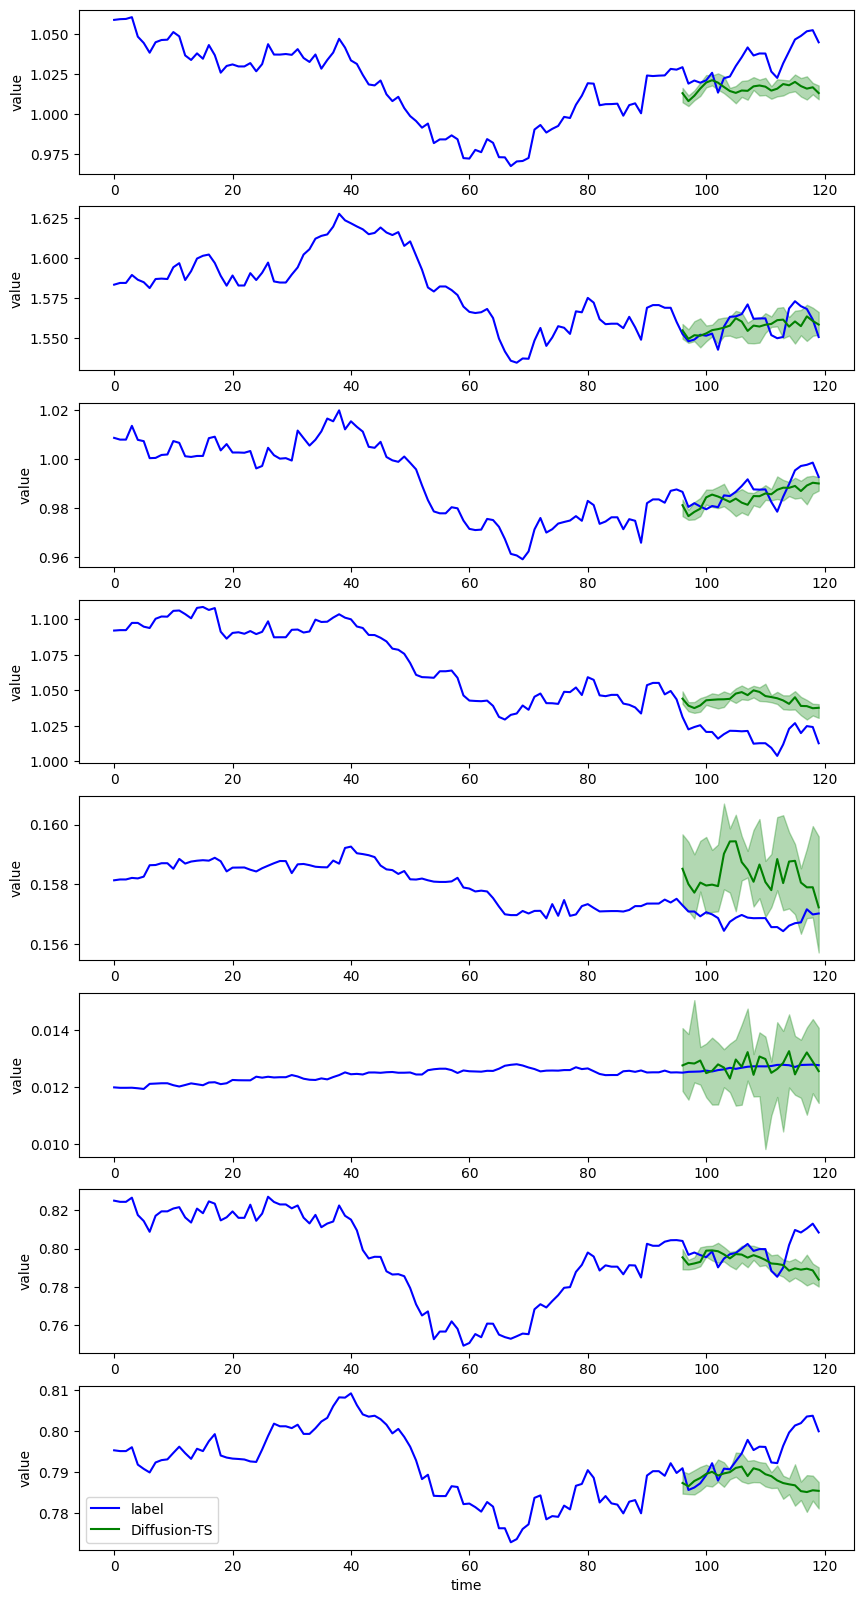

In [14]:
i = 2 #3000
feat_dim = synthetic_data.shape[2]
feat_dim = 8
fig, axes = plt.subplots(nrows=feat_dim, ncols=1, figsize=(10, 20))
for feat_idx in range(feat_dim):
    df_x = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": (1-target_mask)[i, feat_idx, :]})
    df_x = df_x[df_x.y!=0]

    df_o = pd.DataFrame({"x": np.arange(0, seq_len), "val": gt_data[i, feat_idx, :],
                         "y": target_mask[i, feat_idx, :]})
    # df_o = df_o[df_o.y!=0]
    axes[feat_idx].plot(df_o.x, df_o.val, color='b',  linestyle='solid', label='label')
    # axes[feat_idx].plot(df_x.x, df_x.val, color='r', marker='x', linestyle='None')
    axes[feat_idx].plot(range(seq_len-24, seq_len), mid_q[i, feat_idx, -24:], color='g', linestyle='solid', label='Diffusion-TS')
    axes[feat_idx].fill_between(range(seq_len-24, seq_len), low_q[i, feat_idx,-24:],high_q[i,feat_idx, -24:], color='g', alpha = 0.3)
    plt.setp(axes[feat_idx], ylabel='value')
    if feat_idx == feat_dim-1:
        plt.setp(axes[-1], xlabel='time')
    # axes[feat_idx].set_ylim(-3, 3)
plt.legend()
plt.show()

In [16]:
from metrics.imputation_metrics import mse_withmask, mae_withmask, calc_quantile_CRPS, calc_quantile_CRPS_sum
mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask))

tensor(0.0004)

In [17]:
torch.sqrt(mse_withmask(torch.Tensor(mid_q),torch.Tensor(gt_data),torch.Tensor(target_mask)))

tensor(0.0197)

In [18]:
calc_quantile_CRPS(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.015494395243494134

In [19]:
calc_quantile_CRPS_sum(torch.Tensor(gt_data),torch.Tensor(synthetic_data),torch.Tensor(target_mask),mean_scaler=0,scaler=1)

0.003601806728463424